In [23]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from utils import *
from nn import Sequential, Dense

	100%|████████████████████| 7/7 [00:00<00:00, 3522.09it/s]
Epoch: 1
loss = 1.24



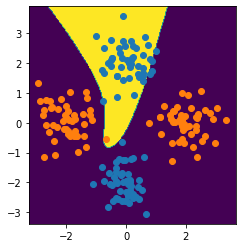

	  0%|                    | 0/7 [00:00<?, ?it/s]
Epoch: 2
loss = 0.91

Epoch: 3
loss = 0.74

Epoch: 4
loss = 0.58

Epoch: 5
	100%|████████████████████| 7/7 [00:00<00:00, 3496.09it/s]
loss = 0.42

Epoch: 6
loss = 0.30

Epoch: 7
loss = 0.23

Epoch: 8
	100%|████████████████████| 7/7 [00:00<00:00, 3487.37it/s]
loss = 0.17

Epoch: 9
loss = 0.14

Epoch: 10
loss = 0.12

	  0%|                    | 0/7 [00:00<?, ?it/s]11
loss = 0.11

Epoch: 12
loss = 0.10

Epoch: 13
loss = 0.09

Epoch: 14
	100%|████████████████████| 7/7 [00:00<00:00, 2337.96it/s]
loss = 0.08

Epoch: 15
loss = 0.08

Epoch: 16
loss = 0.07

Epoch: 17
	  0%|                    | 0/7 [00:00<?, ?it/s]loss = 0.07

Epoch: 18
loss = 0.06

Epoch: 19
loss = 0.06

Epoch: 20
	100%|████████████████████| 7/7 [00:00<00:00, 1400.37it/s]
loss = 0.06

Epoch: 21
loss = 0.06

Epoch: 22
loss = 0.05

	  0%|                    | 0/7 [00:00<?, ?it/s] 23
loss = 0.05

Epoch: 24
loss = 0.05

Epoch: 25
loss = 0.05

Epoch: 26
	100%|████████████████████| 7/

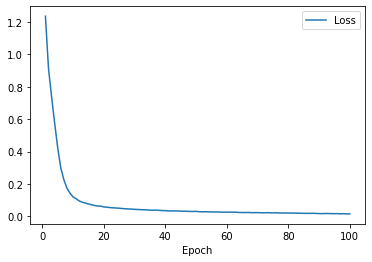

In [24]:
data, labels = join_classes(
    normal(50, [0, 2], 0.5),
    normal(50, [-2, 0], 0.5),
    normal(50, [0, -2], 0.5),
    normal(50, [2, 0], 0.5),
    labels=[1, -1, 1, -1]
)
# plot_dataset(data, labels)
# plt.show()

model = Sequential(2, Dense(6), Dense(6), Dense(1),
                   activation='tanh', lr=5e-3)
model.fit(data, labels, epochs=100, callbacks=[
          AnimStep(data, labels, binary=True)])

In [14]:
from pathlib import Path
import requests
import pickle
import gzip

DATA_DIR = Path('.')
URL = "https://github.com/pytorch/tutorials/raw/master/_static/"
FILENAME = "mnist.pkl.gz"
PATH = DATA_DIR / FILENAME

DATA_DIR.mkdir(parents=True, exist_ok=True)

if not PATH.exists():
    content = requests.get(URL + FILENAME).content
    PATH.open("wb").write(content)

with gzip.open(PATH.as_posix(), "rb") as f:
    ((x_train, y_train), (x_test, y_test), _) = pickle.load(f, encoding="latin-1")

im_size = (28, 28)
arr_size = np.prod(im_size)

x_sample = x_test[np.random.randint(1000, size=8)]

	  6%|█▏                  | 91/1563 [00:00<00:01, 908.51it/s]
Epoch: 1
	  6%|█                   | 86/1563 [00:00<00:01, 841.76it/s]loss = 1.02

Epoch: 2
	  9%|█▉                  | 147/1563 [00:00<00:01, 729.39it/s]loss = 0.60

Epoch: 3
	  3%|▋                   | 51/1563 [00:00<00:02, 506.40it/s]loss = 0.51

Epoch: 4
	 10%|█▉                  | 156/1563 [00:00<00:01, 772.60it/s]loss = 0.46

Epoch: 5
	  4%|▊                   | 68/1563 [00:00<00:02, 677.74it/s]loss = 0.43

Epoch: 6
	  4%|▊                   | 64/1563 [00:00<00:02, 630.54it/s]loss = 0.40

Epoch: 7
	  6%|█                   | 86/1563 [00:00<00:01, 855.10it/s]loss = 0.38

Epoch: 8
	  6%|█▎                  | 98/1563 [00:00<00:01, 971.27it/s]loss = 0.36

Epoch: 9
	  4%|▊                   | 68/1563 [00:00<00:02, 674.20it/s]loss = 0.34

Epoch: 10
	  4%|▊                   | 68/1563 [00:00<00:02, 675.41it/s]loss = 0.33

Epoch: 11
	 10%|██                  | 164/1563 [00:00<00:01, 817.38it/s]loss = 0.32

Epoch: 12
	 11%|██  

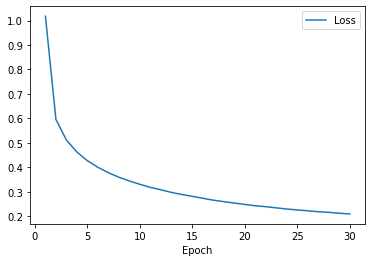

MNIST accuracy: 0.964


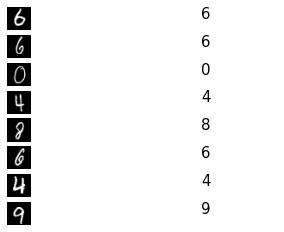

In [15]:
model = Sequential(arr_size, Dense(30), Dense(10), activation='tanh')
model.fit(x_train, onehot(y_train, 10), epochs=30)

output = model.forward(x_test)
print('MNIST accuracy:', np.mean(np.argmax(output, axis=1) == y_test))

# visualize prediction
output = np.argmax(model.forward(x_sample), axis=1)

for i in range(8):
    # plot image
    ax = plt.subplot(8, 2, 2 * i + 1)
    ax.axis('off')
    ax.imshow(x_sample[i].reshape(im_size), cmap='gray')

    # plot prediction
    ax = plt.subplot(8, 2, 2 * i + 2)
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.axis('off')
    ax.text(0, 0, str(output[i]), fontsize=15)

plt.show()

In [22]:
# autoencoder = Sequential(arr_size, 30, 10, 30, arr_size,
#                          activation='logistic', lr=5e-3)
# autoencoder.fit(x_train, x_train, epochs=50)

output = autoencoder.forward(x_sample)

for i in range(8):
    # plot original image
    ax = plt.subplot(8, 2, 2 * i + 1)
    ax.axis('off')
    ax.imshow(x_sample[i].reshape(im_size), cmap='gray')

    # plot reconstructed image
    ax = plt.subplot(8, 2, 2 * i + 2)
    ax.axis('off')
    ax.imshow(output[i].reshape(im_size), cmap='gray')

plt.show()

<IPython.core.display.Javascript object>